# CS437 Final Project - Avery & Nikunj - CornerComm

In [ ]:
This notebook gives our implementation of detecting binary bits transmitted using radar backscatter communication.

In [87]:
# import required libraries
import struct
import sys
import serial
import binascii
import time
import numpy as np
import math

import os
import datetime
import matplotlib.pyplot as plt

# Local File Imports
# This assumes you have the parse_bin_output file with helper functions from the lab
from parse_bin_output import *

# Modify this number to indicate how many binary files are in the folder you paste below
num_files = 2


# specify the binary file path below
#binFilePath = "C:/Users/aplot/Documents/School/UIUC/CS 437 - IOT/Lab instructions/prelab-4-CS437/Prelab-4/Industrial_Visualizer/binData/10_31_2023_15_34_12"
binFilePath = "C:/Users/aplot/Documents/School/UIUC/CS 437 - IOT/Lab instructions/prelab-4-CS437/Prelab-4/Industrial_Visualizer/binData/12_13_2023_14_58_18 - close"
output_dict = parse_ADC(binFilePath, None, num_files)
print(f"\neach frame dict contains following informations: {output_dict[0].keys()}")

test
processing file: C:/Users/aplot/Documents/School/UIUC/CS 437 - IOT/Lab instructions/prelab-4-CS437/Prelab-4/Industrial_Visualizer/binData/12_13_2023_14_58_18 - close\pHistBytes_1.bin
processing file: C:/Users/aplot/Documents/School/UIUC/CS 437 - IOT/Lab instructions/prelab-4-CS437/Prelab-4/Industrial_Visualizer/binData/12_13_2023_14_58_18 - close\pHistBytes_2.bin

each frame dict contains following informations: dict_keys(['targetFrameNum', 'header', 'bytes', 'numDetectedPoints', 'pointCloud', 'rangeProfile'])


Below, we will do some basic plotting. All we are doing is taking the biggest amplitude of the range profile for each frame and using that to create an array of data. We can then find the peaks of this new plot to determine when the reflector is turning and then from that determine what bits are being sent.

This implementation assumes that the reflection caused by the corner reflector will result in a reflection that is the greatest in the range profile. But at distances above ~10 feet or with other objects nearby this would not be the case. In the future, we hope to implement a way to pick out the periodic reflections using more advanced processing of the range profiles or using raw data.

Detecting the peaks (at distance) would be the main challenge of bringing this project to use in real life for roadsigns. So many more advanced implementations could be tested to improve the project.


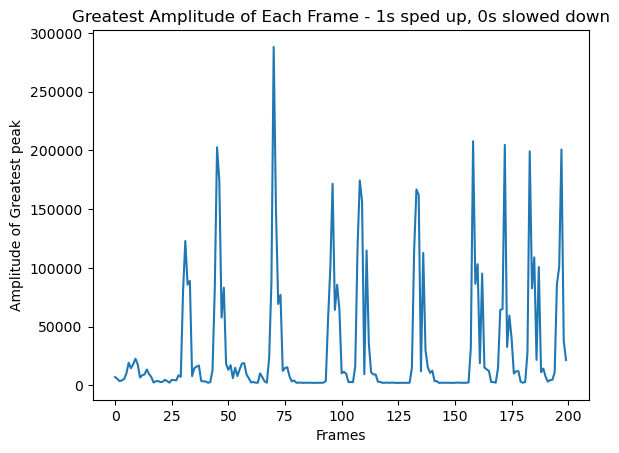

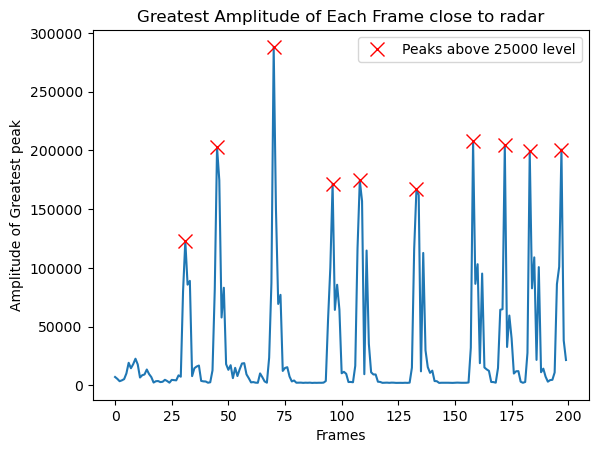

[ 31  45  70  96 108 133 158 172 183 197]


In [91]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

max_arr = []

# combines all range profiles max points into one array
for frame in range(num_files * 100):
    profile = output_dict[frame]['rangeProfile']
    max_arr.append(max(profile))

plt.plot(max_arr)
plt.xlabel("Frames")
plt.ylabel("Amplitude of Greatest peak")
plt.title("Greatest Amplitude of Each Frame - 1s sped up, 0s slowed down")
plt.show()

# The height of this function may need to be adjusted. This is another thing that could be worked on more to improve this implementation.
peaks, _ = find_peaks(max_arr, height=25000, distance = 9)

# Extract the peak values
peaks_above_set_level = [max_arr[i] for i in peaks]

# Plot the original data with peaks marked
plt.plot(max_arr)
plt.plot(peaks, peaks_above_set_level, "x", color="red", markersize=10, label="Peaks above 25000 level")
plt.xlabel("Frames")
plt.ylabel("Amplitude of Greatest peak")
plt.title("Greatest Amplitude of Each Frame close to radar")
plt.legend()
plt.show()
print(peaks)

Now all we need to do is take the peaks we've detected and calculate the time difference in between them to determine if they are a 1 or a 0.

In [92]:
output_string = ""

# 1s normally have a difference of 13 frames and 0s have about 25

for i in range(1, len(peaks)):
    if peaks[i] - peaks[i-1] < 18:
        output_string += "1"
    # below we have a max time difference to try and elimiate some noise when the corner reflector is done turning
    elif peaks[i] - peaks[i-1] >= 18 and peaks[i] - peaks[i-1] < 40:
        output_string += "0"
        
print(output_string)



100100111
